In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#load files
try:
    train_file = "train.csv"
    test_file = "test.csv"
    test_data = pd.read_csv(test_file)
    train_data = pd.read_csv(train_file)
    print(test_file, train_file,"loaded succesfully")
except Exception as e:
    print("Error occured {}".format(e))

test.csv train.csv loaded succesfully


In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Get data ready 
y_train_data = train_data.iloc[:,0]
x_train_data = train_data.drop("label", axis=1)
x_test_data = test_data

In [6]:
y_train_data.shape, x_train_data.shape, x_test_data.shape

((42000,), (42000, 784), (28000, 784))

In [7]:
y_train_data = y_train_data.to_numpy()

In [8]:
x_train_data = x_train_data.to_numpy()

In [9]:
X_test_data = x_test_data.to_numpy()

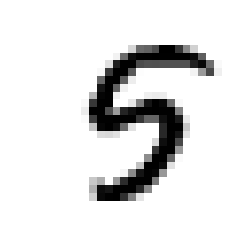

In [10]:
# In the training data there is 42000 images and each image has 784 features. This is because each image is 28x28 
# pixals
some_digit = x_train_data[8]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [11]:
y_train_data[8]

5

In [12]:
y_train_data = y_train_data.astype(np.uint8)

In [13]:
# Training a Binary Classifier
y_train_5 = (y_train_data == 5) # true for all 0s, false for all other digits

In [14]:
# Stochastic Gradiend Descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train_data, y_train_5)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

In [16]:
# Performance Measures
# Measuring Accuracy Using Cross-Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train_data, y_train_5, cv=3, scoring = "accuracy")

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.96457143, 0.96007143, 0.9645    ])

In [17]:
# check how accurate it classifies 'not-zeros'
from sklearn.base import BaseEstimator

class NeverZeroClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

In [18]:
# 90 percent accuracy because about 10 percent of the data are 0's, 
# if you always guess its not a 0 --> youl be right about 90 percent of the time
never_zero_clf = NeverZeroClassifier()
cross_val_score(never_zero_clf, x_train_data, y_train_5, cv = 3, scoring = "accuracy")

array([0.90885714, 0.91107143, 0.909     ])

In [19]:
# Confusion Matrix
# Much better way to evaluate performance of a classifier

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train_data, y_train_5, cv=3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[37499,   706],
       [  846,  2949]])

In [21]:
# above, ^ 37,406 were correctly classified as non-zeros --> true negatives
# 462 of them were wrongly classified as zeros --> false positives
# 191 were wrongly classified as non-zeros --> false negative
# 3941 were correctly classified as zeros --> true positive

# Precision 
# Precision = TP/(TP+FP)

precision = 3941/(3941+462)
precision

0.8950715421303657

In [22]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8068399452804378

In [23]:
recall_score(y_train_5, y_train_pred)

0.7770750988142292

In [24]:
# F1 Score
# F1 = 2/((1/precision)+(1/recall)) = TP/((TP)+((FN+FP)/2))
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7916778523489933

In [25]:
# Precision/Recall Trade-off
# Lowering the threshold increases recall and reduces precision
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([301355.12241374])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
# Raise the threshold
threshold = 1000000000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [28]:
# How to decide which threshold to use
y_scores = cross_val_predict(sgd_clf, x_train_data, y_train_5, cv=3, method="decision_function")

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

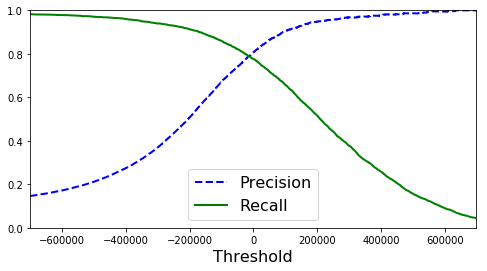

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower center", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

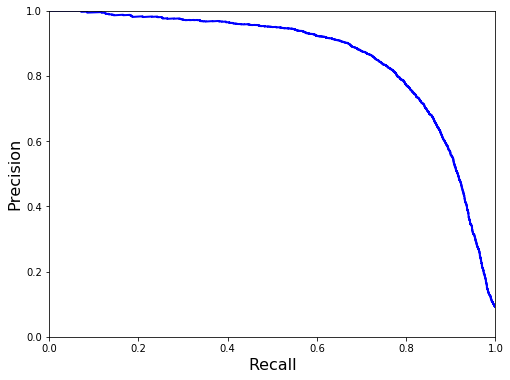

In [31]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [32]:
# Probably want to select a precision/recall trade-off just before the drop--> around 60%
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

In [33]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [34]:
precision_score(y_train_5, y_train_pred_90)

0.9001769911504425

In [35]:
recall_score(y_train_5, y_train_pred_90)

0.6700922266139657

In [36]:
#Note --> if someone says, " Lets reach 99 percent precision"
# Well, at what recall?


In [37]:
# The ROC Curve
# The receiver operating characgteristic (ROC) 
# plots the true positive rate (recall) against the false positive rate
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

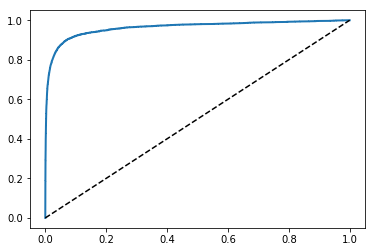

In [38]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--') # dashboard diagonal
plot_roc_curve(fpr,tpr)

In [39]:
# The dotted line represents the ROC curve of a purely random clasifier: 
# A good classsifier staays as far away from that line as possible(the top left corner)
# Copare classifiers by measuring the area under the curve
# Perfect classifier will have a ROC AUC = 1, while a random classifier will equal 0.5

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9627276951761

In [40]:
# The ROC curve looks good because there are few positive 5s compared to negatives( non-5s)
# The PR curve makes it clear that there is room for improvement.

In [41]:
# RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train_data, y_train_5, cv = 3, method = "predict_proba")

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
y_scores_forest = y_probas_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

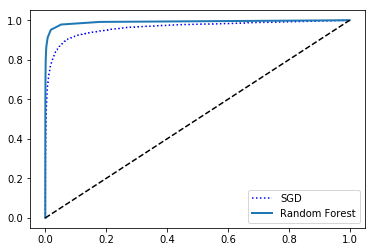

In [43]:
plt.plot(fpr,tpr,"b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [44]:
# The Random Forest ROC is superior --> closer to the top-left corner and has greater AUC
roc_auc_score(y_train_5, y_scores_forest)

0.9914475286657394

In [46]:
forest_clf.fit(x_train_data, y_train_data)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [48]:
cross_val_score(forest_clf, x_train_data, y_train_data, cv=3, scoring = "accuracy")

array([0.93159097, 0.93749107, 0.93684812])

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_data= scaler.fit_transform(x_train_data.astype(np.float64))
cross_val_score(forest_clf, x_train_data, y_train_data, cv=3, scoring = "accuracy")

array([0.93144816, 0.93741963, 0.93691956])

In [51]:
# Error analysis
y_train_pred = cross_val_predict(forest_clf, x_train_data, y_train_data, cv=3)
conf_mx = confusion_matrix(y_train_data, y_train_pred)
conf_mx

array([[4041,    1,   11,    8,    8,   11,   20,    2,   28,    2],
       [   2, 4605,   15,   16,    6,    8,    8,    7,   12,    5],
       [  35,   21, 3923,   48,   25,   11,   20,   47,   38,    9],
       [  23,   18,  102, 3972,   12,  102,    9,   20,   66,   27],
       [   8,   12,   19,   12, 3841,   11,   24,   13,   21,  111],
       [  29,    9,   17,  170,   19, 3435,   45,    4,   46,   21],
       [  48,   10,   19,    7,   30,   50, 3949,    3,   20,    1],
       [   5,   28,   63,   23,   53,    5,    1, 4135,   14,   74],
       [  18,   34,   57,  111,   40,   98,   24,   10, 3625,   46],
       [  18,   18,   26,   69,  139,   38,    4,   76,   45, 3755]])

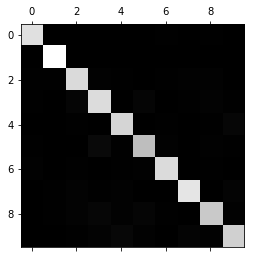

In [52]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [56]:
# This looks good but lets focus on the errors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

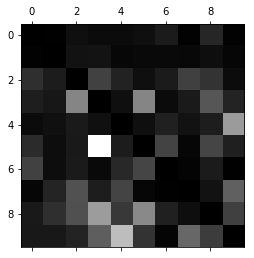

In [57]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [68]:

# Testing
predictions = forest_clf.predict(x_test_data)
pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
              "Label":predictions}).to_csv("Submission.csv", index = False)
